<a href="https://colab.research.google.com/github/DrShabirAhmad/Code/blob/main/Scaler_Jamboree_Education_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2023-12-20 14:56:11--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.226, 99.84.178.172, 99.84.178.132, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.1’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2023-12-20 14:56:11 (184 MB/s) - ‘Jamboree_Admission.csv.1’ saved [16176/16176]



In [113]:
df = pd.read_csv("Jamboree_Admission.csv")

In [114]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [116]:
df.shape

(500, 9)

In [117]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [118]:
df = df.rename(columns = {'LOR ' : 'LOR', 'Chance of Admit ': 'Chance of Admit'})
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [119]:
df.drop("Serial No.", axis=1, inplace=True)

In [120]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [121]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


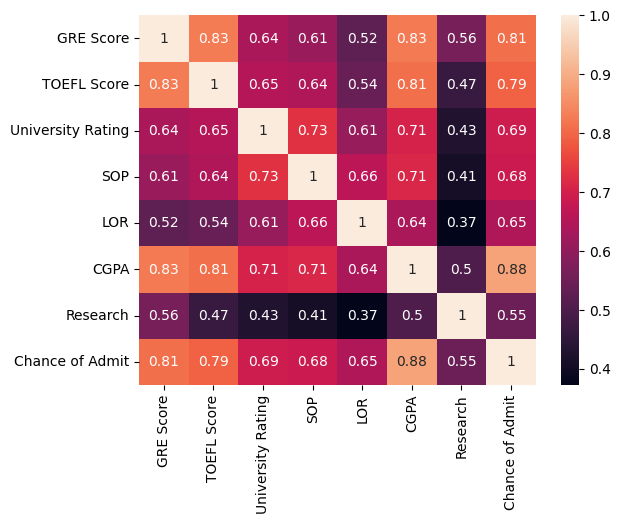

In [122]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [123]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [124]:
df.duplicated().sum()

0

In [125]:
df["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

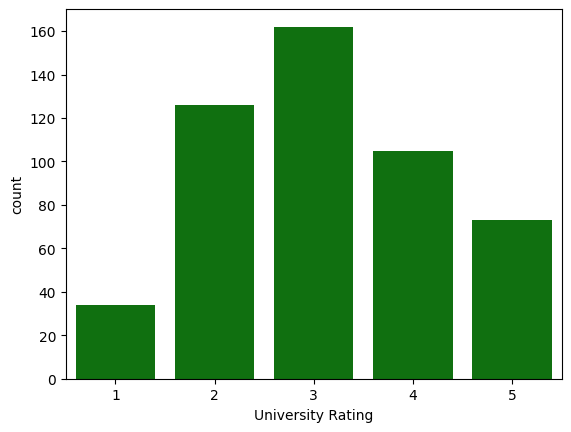

In [126]:
sns.countplot(x=df["University Rating"], color='g')
plt.show()

In [127]:
df["SOP"].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

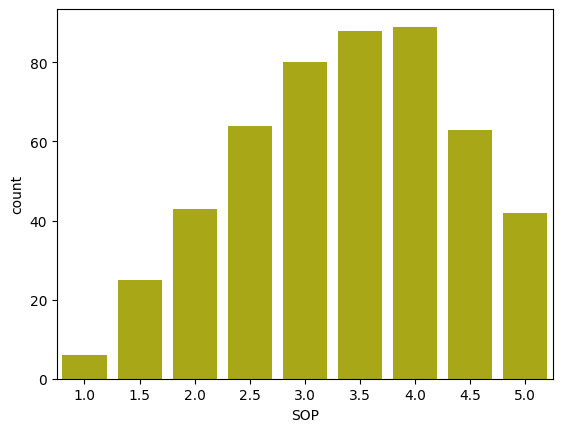

In [128]:
sns.countplot(x=df["SOP"], color='y')
plt.show()

In [129]:
df["LOR"].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

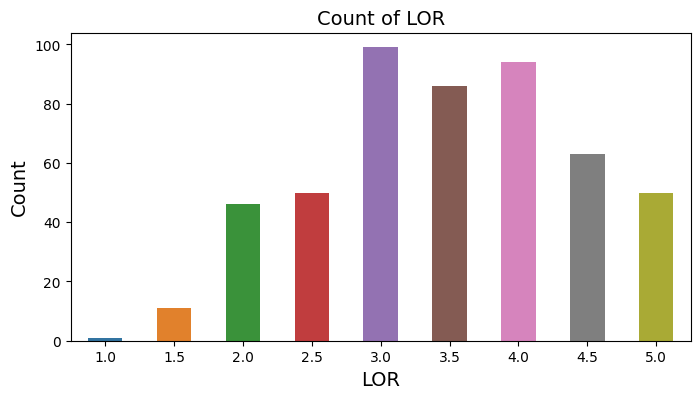

In [130]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='LOR', width=.5)
plt.xlabel('LOR', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of LOR', fontsize=14)
plt.show()

In [131]:
df["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

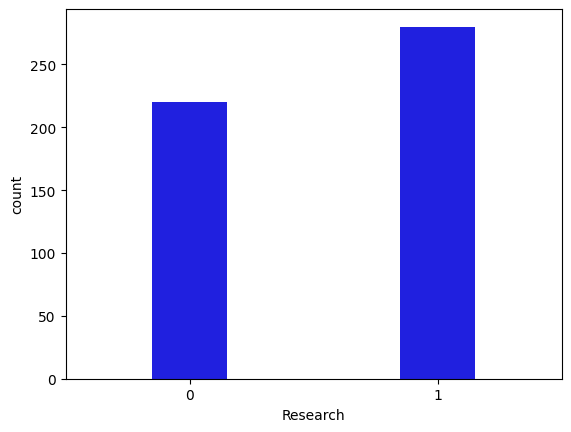

In [132]:
sns.countplot(data= df, x="Research", width=0.3, color='b')
plt.show()

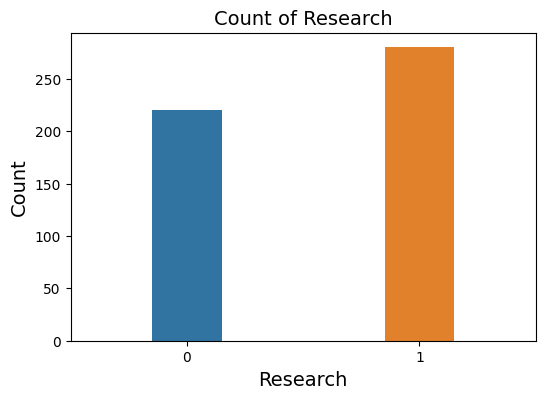

In [133]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Research', width=.3)
plt.xlabel('Research', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Research', fontsize=14)
plt.show()

In [134]:
df['Research'].nunique()

2

In [135]:
df['University Rating'].nunique()

5

In [136]:
df['SOP'].nunique()

9

In [137]:
df['CGPA'].nunique()

184

In [138]:
def unique_values(df):
  cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
  for col in cols:
    print(col, ":", df[col].nunique())
unique_values(df)

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR : 9
CGPA : 184
Research : 2


In [139]:
df_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
for col in df_cols:
    print(col, ":", df[col].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR : 9
CGPA : 184
Research : 2


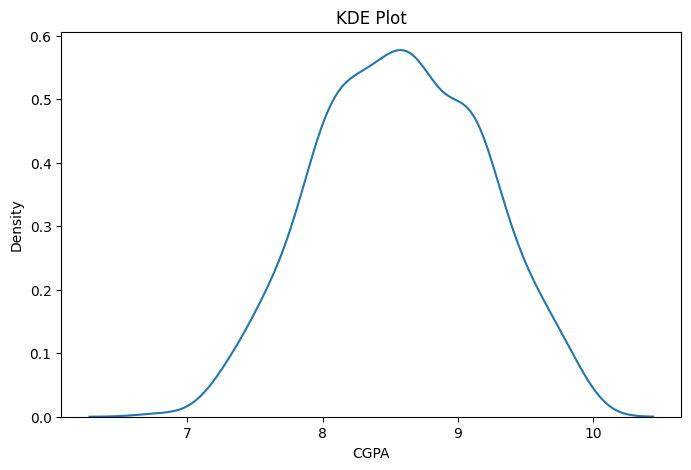

In [140]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['CGPA'])
plt.title('KDE Plot')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.show()

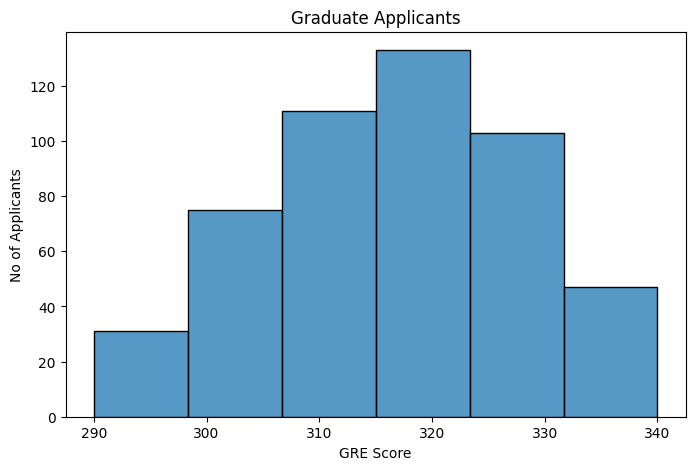

In [141]:
plt.figure(figsize=(8, 5))
sns.histplot(df['GRE Score'], bins=6)
plt.title('Graduate Applicants')
plt.xlabel('GRE Score')
plt.ylabel('No of Applicants')
plt.show()

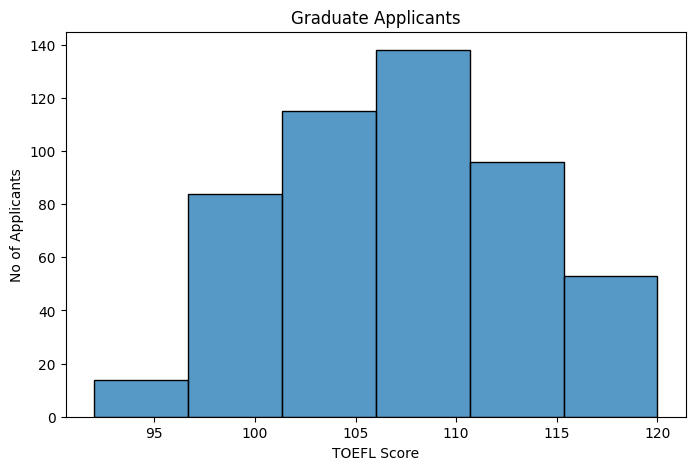

In [142]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TOEFL Score'], bins=6)
plt.title('Graduate Applicants')
plt.xlabel('TOEFL Score')
plt.ylabel('No of Applicants')
plt.show()

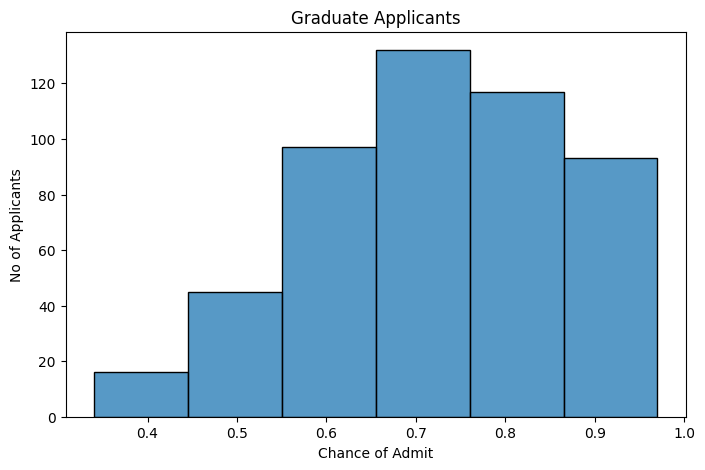

In [143]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Chance of Admit'], bins=6)
plt.title('Graduate Applicants')
plt.xlabel('Chance of Admit')
plt.ylabel('No of Applicants')
plt.show()

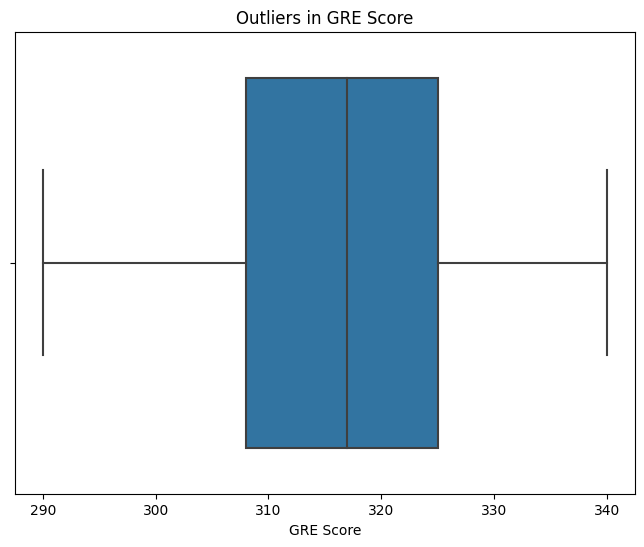

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='GRE Score')
plt.title("Outliers in GRE Score")
plt.xticks(rotation=0)
plt.show()

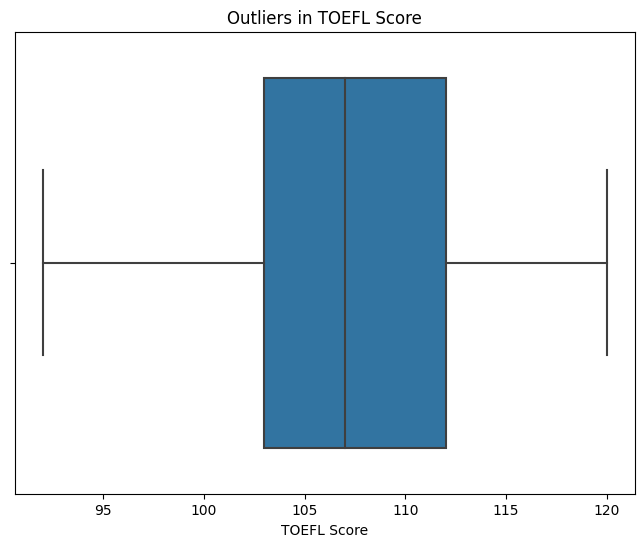

In [145]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TOEFL Score')
plt.title("Outliers in TOEFL Score")
plt.xticks(rotation=0)
plt.show()

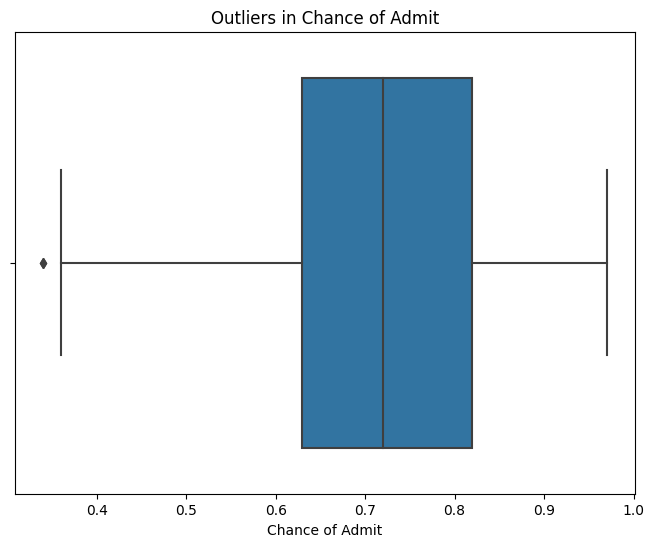

In [146]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Chance of Admit')
plt.title("Outliers in Chance of Admit")
plt.show()

In [147]:
X = df[df.columns.drop('Chance of Admit')]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [148]:
y = df["Chance of Admit"]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [149]:
# Statmodels implementation of Linear regression : OLS Method
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train Test Split by 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Scaling or Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_train_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          7.20e-129
Time:                        14:56:17   Log-Likelihood:                 501.39
No. Observations:                 350   AIC:                            -986.8
Df Residuals:                     342   BIC:                            -955.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7225      0.003    231.327      0.0

In [150]:
X_test= sm.add_constant(X_test)
sm_pred=sm_model.predict(X_test)
sm_pred

129    12.636033
280    11.707414
440    11.439820
384    12.786847
225    11.148049
         ...    
17     11.929505
479    12.245610
357    11.383225
332    11.619820
345    11.649095
Length: 150, dtype: float64

# •	Testing the assumptions of linear regression:
1. Multicollinearity check by VIF score



In [151]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()        # blank dataframe to store VIF Values
X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns) # add values and columns to dataframe
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1332.58
1,TOEFL Score,1307.04
5,CGPA,986.81
3,SOP,32.44
4,LOR,30.63
2,University Rating,20.15
6,Research,2.90


In [152]:
cols2 = vif['Features'][1:].values
X2 = pd.DataFrame(X_train_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     267.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          5.20e-126
Time:                        14:56:17   Log-Likelihood:                 491.72
No. Observations:                 350   AIC:                            -969.4
Df Residuals:                     343   BIC:                            -942.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7225      0.00

In [153]:
vif_threshold = 5
r2_threshold = 0.85
i = 0
features_removed = []
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_train_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_threshold) or (sm_model.rsquared_adj < r2_threshold):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', features_removed)
    break
  features_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    TOEFL Score
VIF             1332.58
Name: 0, dtype: object
Current adj.R2 0.8094857293421998
Features removed: 0
List of features removed: []


In [154]:
print(vif)
print(sm_model.summary())

            Features      VIF
0        TOEFL Score  1332.58
1               CGPA  1307.04
5           Research   986.81
3                LOR    32.44
4  University Rating    30.63
2                SOP    20.15
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.48e-122
Time:                        14:56:17   Log-Likelihood:                 480.62
No. Observations:                 350   AIC:                            -949.2
Df Residuals:                     344   BIC:                            -926.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         


# 2. There should be only linear relationship between features and target variable


In [155]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


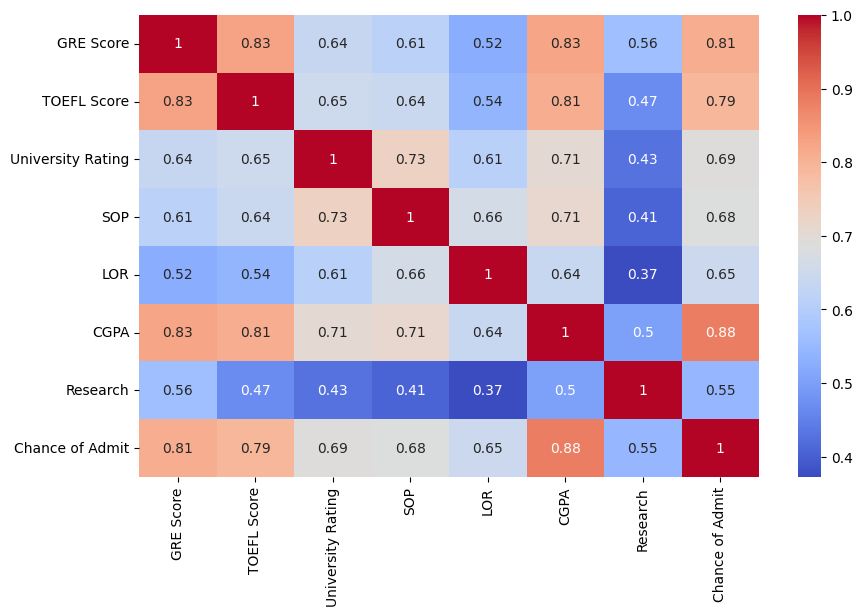

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="coolwarm", annot=True)
plt.show()

# 3. Erros must be Normally distributed

In [157]:
# adding constant for test set and fitting the model
X_sm = sm.add_constant(X_train_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

# Prediction
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

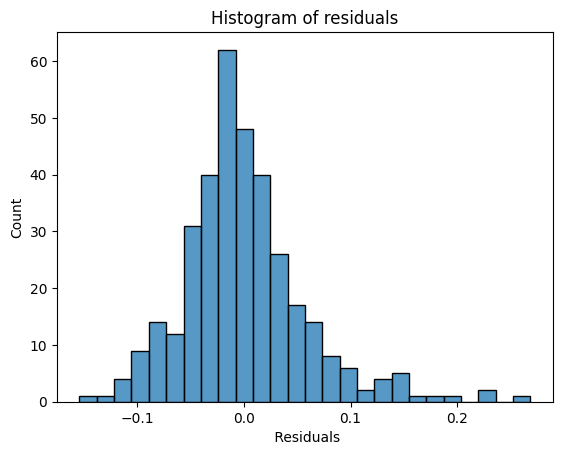

In [158]:
# Testing Normality of errors distribution by histplot
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

In [159]:
# Testing Normality of errors distribution by Shapiro wilk test
from scipy import stats

print("Null Hypothesis (H0) :  The errors are normally distributed.")
print("Alternate Hypothesis (Ha) : The errors are not normally distributed")

statistic, pvalue = stats.shapiro(errors)

print("Test_statistice :", statistic)
print("P Value :", pvalue)

alpha = 0.05
if pvalue < alpha:
  print("Reject H0, therefore there is strong evidence that our Null Hypothesis should be rejected, hence errors are not normally distributed")
else:
  print("Fail to Reject H0, therefore there is strong evidence that our Null Hypothesis should be accepted, hence errors are normally distributed")

Null Hypothesis (H0) :  The errors are normally distributed.
Alternate Hypothesis (Ha) : The errors are not normally distributed
Test_statistice : 0.941691517829895
P Value : 1.6735426933145447e-10
Reject H0, therefore there is strong evidence that our Null Hypothesis should be rejected, hence errors are not normally distributed


# 4. Checking for Homoscedasticity & Heteroscedasticity by Scatter plot

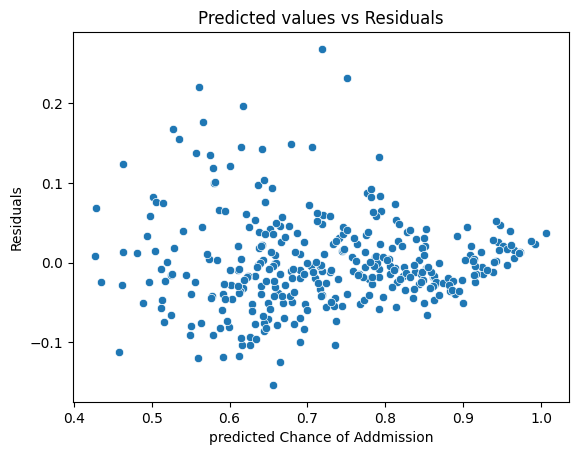

In [160]:
# Plotting Residuals and errors

sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Chance of Addmission")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

# Using Goldfeld Quandt Test to check homoscedascity

In [161]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

print("Null Hypothesis (H0) :  There is Homoscedascity in the data.")
print("Alternate Hypothesis (Ha) : There is Heteroscedascity in the data")

F_statistic, p_value, conclusion = sms.het_goldfeldquandt(y_train, X_sm)
print("F_statistic : ", F_statistic)
print("p_value : ", p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject H0, Since p_value is less than 0.05, therefore there is strong evidence that our Null Hypothesis should be rejected, hence there is Heteroscedascity")
else:
  print("Fail to Reject H0, Since p_value is greater than 0.05, therefore there is strong evidence that our Null Hypothesis should be accepted, hence there is Homoscedascity")

Null Hypothesis (H0) :  There is Homoscedascity in the data.
Alternate Hypothesis (Ha) : There is Heteroscedascity in the data
F_statistic :  0.9223637790731195
p_value :  0.6989321688927994
Fail to Reject H0, Since p_value is greater than 0.05, therefore there is strong evidence that our Null Hypothesis should be accepted, hence there is Homoscedascity


In [162]:
# 5. Mean of residuals should be close to zero
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train
np.sum(errors)

1.5709655798445965e-14

In [163]:
# 6. Autocorrelation should not be present among the features. Since time feature is not present,
#therefore this assumption need not be tested or it is applicable for Time Series Analysis.

# Linear Regression by sklearn

In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

X = df[df.columns.drop('Chance of Admit')]
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)

LinearRegression()

In [165]:
# r2_score
sklr.score(X_train,y_train)

0.8332295208571244

In [166]:
sklr.coef_

array([0.00262901, 0.00231292, 0.00520748, 0.00080892, 0.0200542 ,
       0.11315723, 0.02656773])

In [167]:
sklr.intercept_

-1.4323741707447017

In [168]:
# predict
y_pred=sklr.predict(X_test)
y_pred

array([0.9309531 , 0.72489282, 0.53403236, 0.97671545, 0.54601857,
       0.62187632, 0.81149089, 0.58454954, 0.5074575 , 0.6253587 ,
       0.61977884, 0.54785062, 0.49078767, 0.70620981, 0.52940389,
       0.689215  , 0.51875156, 0.63969492, 0.77379919, 0.88561105,
       0.87390632, 0.76298757, 0.67641026, 0.46333   , 0.78431596,
       0.88874915, 0.73287804, 0.70175186, 0.58397981, 0.61402829,
       0.73417225, 0.97859528, 0.50247354, 0.95880399, 0.68093955,
       0.72037634, 0.79057677, 0.79242859, 0.64357782, 0.68875946,
       0.82762346, 0.9611836 , 0.78446034, 0.94330161, 0.59666375,
       0.75331895, 0.77259854, 0.99624079, 0.88334747, 0.79224222,
       0.60639345, 0.5345322 , 0.91164184, 0.68920765, 0.73825789,
       0.54747819, 0.93290361, 0.73355898, 0.997998  , 0.7562652 ,
       0.59947761, 0.71838848, 0.70153481, 0.95532286, 0.70436121,
       0.67667125, 0.72011201, 0.78987651, 0.64222538, 0.75325503,
       0.65828084, 0.57104088, 0.6171557 , 0.90731242, 0.84049

In [169]:
y_pred.shape

(150,)

In [170]:
X_test.shape

(150, 7)

In [171]:
y_test.shape

(150,)

In [172]:
# metrics r2_score
from sklearn.metrics import r2_score

test_r2_score= r2_score(y_test, y_pred)
test_r2_score

0.7888675572145216

In [173]:
print(X_test.shape[0], "&", X_test.shape[1])

150 & 7


In [174]:
def adj_r2(r2,n,k):
  r2 = test_r2_score
  n= X_test.shape[0]
  k= X_test.shape[1]
  return 1 - (((1-r2)*(n-1))/(n-k-1))

adj_r2(test_r2_score,X_test.shape[0],X_test.shape[1])

0.7784596198941107

In [175]:
 #creates polynomial feature
from sklearn.preprocessing import PolynomialFeatures

degree=6
pol_t=PolynomialFeatures(degree)
print("Orig Shape:", X.shape)
X_poly = pol_t.fit_transform(X)
print("After Transformation Shape:", X_poly.shape)

Orig Shape: (500, 7)
After Transformation Shape: (500, 1716)


In [176]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [177]:
 # train-test split
from sklearn.model_selection import train_test_split
X = df[df.columns.drop('Chance of Admit')]
y = df['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

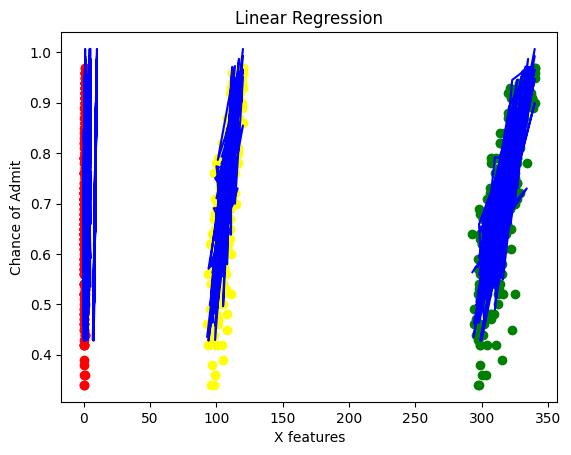

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

plt.scatter (X_train['GRE Score'], y_train, color="green")

plt.scatter (X_train['TOEFL Score'], y_train, color="yellow")

plt.scatter (X_train['Research'], y_train, color="red")

plt.plot(X_train, LinReg.predict(X_train), color="blue")
plt.title("Linear Regression")
plt.xlabel("X features")
plt.ylabel("Chance of Admit")

plt.show()

# Polynomial Regression Model

In [179]:
from sklearn.preprocessing import PolynomialFeatures

polynom =PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)

X_polynom

array([[  1.    , 327.    , 104.    , ...,  78.1456,   8.84  ,   1.    ],
       [  1.    , 325.    , 111.    , ...,  82.9921,   9.11  ,   1.    ],
       [  1.    , 322.    , 114.    , ...,  79.9236,   8.94  ,   1.    ],
       ...,
       [  1.    , 300.    ,  95.    , ...,  67.5684,   8.22  ,   1.    ],
       [  1.    , 314.    , 105.    , ...,  68.89  ,   0.    ,   0.    ],
       [  1.    , 293.    ,  97.    , ...,  60.84  ,   7.8   ,   1.    ]])

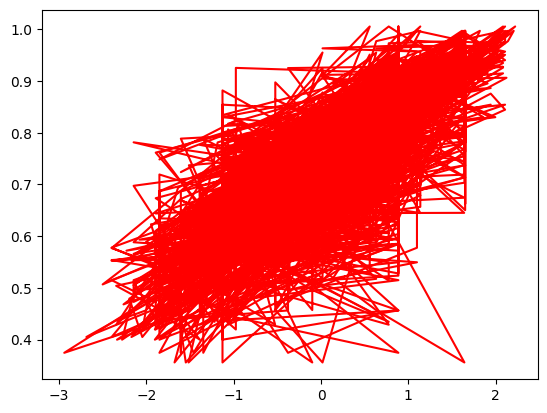

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

X = df[df.columns.drop('Chance of Admit')]
y = df['Chance of Admit']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly, y)

X_Values_poly = poly_features.transform(X)
y_Values = reg.predict(X_Values_poly)

plt.plot(X, y_Values, color="r")
plt.show()

In [181]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

degrees = 7 # number of degress for polynomials
train_scores = []
test_scores = []
scaler = StandardScaler()


### fitting polynomial regression with degree 1 to degrees(20)
for degree in range(1, degrees+1):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), # step 1
                                   scaler, # step 2
                                   LinearRegression()) # step 3

    # transforms and fits all step defined in pipeline automatically
    polyreg_scaled.fit(X_train, y_train)

    # r2 score of trainset
    train_score = polyreg_scaled.score(X_train, y_train)

    # r2 score of testset
    test_score = polyreg_scaled.score(X_test, y_test)

    # we are appending train test scores for comparison
    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

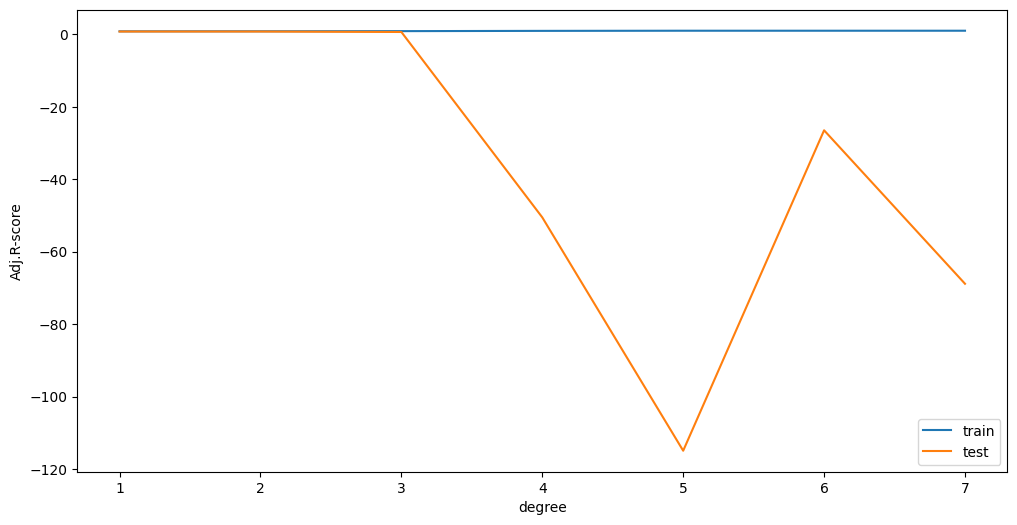

In [182]:
plt.figure(figsize=(12,6))
plt.plot(list(range(1, degrees+1)), train_scores, label="train")
plt.plot(list(range(1, degrees+1)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Adj.R-score")

plt.xticks(range(1, degrees+1))
plt.show()

# Evaluation of Linear Regression Statsmodel

In [183]:
# 1. Mean Squared Error (MSE)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

Y_pred = sm_model.predict(X_sm)

summation = 0
n = len(y)
for i in range(0, n):
  difference = (y_train - Y_pred)
  squared_difference = (difference)**2
  summation += squared_difference
MSE = (summation)/n
print("The Mean Squarred Error is", MSE)

The Mean Squarred Error is 119    0.006954
335    0.000421
192    0.001161
178    0.008755
283    0.000410
         ...   
22     0.000097
72     0.001258
493    0.001962
15     0.010772
168    0.005818
Name: Chance of Admit, Length: 350, dtype: float64


In [184]:
# 2. Root Mean Squared Error (RMSE)

summation = 0
n = len(y)
for i in range(0, n):
  difference = (y_train - Y_pred)
  squared_difference = (difference)**2
  summation += squared_difference
MSE = (summation)/n
RMSE = MSE**0.5
print("The Root Mean Squarred Error is", RMSE)

The Root Mean Squarred Error is 119    0.083389
335    0.020529
192    0.034071
178    0.093569
283    0.020252
         ...   
22     0.009844
72     0.035470
493    0.044299
15     0.103787
168    0.076276
Name: Chance of Admit, Length: 350, dtype: float64


In [185]:
# 13. Mean Absolute Error (MAE)

summation = 0
n = len(y)
for i in range(0, n):
  difference = abs(y_train - Y_pred)
  summation += difference
MAE = (summation)/n
print("The Mean Absolute Error is", MAE)

The Mean Absolute Error is 119    0.083389
335    0.020529
192    0.034071
178    0.093569
283    0.020252
         ...   
22     0.009844
72     0.035470
493    0.044299
15     0.103787
168    0.076276
Name: Chance of Admit, Length: 350, dtype: float64


In [186]:
# 4. R2 Score
from sklearn.metrics import r2_score

Y_pred = sm_model.predict(X_sm)

r2_score = r2_score(y_train, Y_pred)
r2_score

0.8332295208571243

In [187]:
# 5. Adjusted R2 Score

def adj_r2(r2_score, n, k):
  return 1-((1-r2_score)*(n-1))/(n-k-1)

adj_r2(r2_score, X_test.shape[0], X_test.shape[1])

0.825008440899377

In [188]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score


MSE = MSE(y_train, Y_pred)
print("The Mean Squared Error is", MSE)

MAE = MAE(y_train, Y_pred)
print("The Mean ABsolute Error is", MAE)

r2_score = r2_score(y_train, Y_pred)
print("The R2 Score is", r2_score)

The Mean Squared Error is 0.003336046850296589
The Mean ABsolute Error is 0.04163466085388043
The R2 Score is 0.8332295208571243


# Ridge Regression Model

In [189]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = { 'alpha' : [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)

print(ridge_regressor.best_score_)

{'alpha': 5}
-0.0035071476703158883


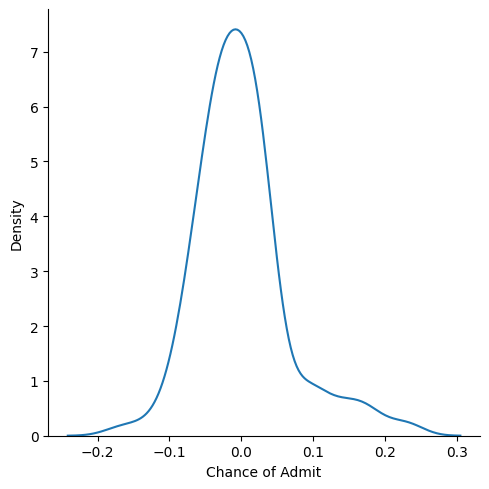

In [190]:
ridge_pred = ridge_regressor.predict(X_test)

sns.displot(ridge_pred-y_test, kind='kde')
plt.show()

# Lasso Regression Model

In [191]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = { 'alpha' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)

print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.003483870952344279


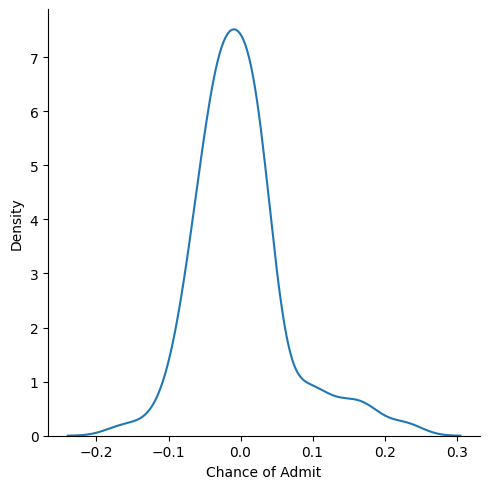

In [192]:
lasso_pred = lasso_regressor.predict(X_test)

sns.displot(lasso_pred-y_test, kind='kde')
plt.show()

In [195]:
LinReg.predict([[303, 113, 3, 4, 4.5, 8.8, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.73046287])

In [193]:
ridge_r2_score = r2_score(ridge_pred, y_test)
ridge_r2_score

TypeError: ignored

In [ ]:
lasso_r2_score = r2_score(lasso_pred, y_test)
lasso_r2_score

In [ ]:
# Ridge Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#step2: Scaling or Standardization
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)

# Step 3: training model
model = Ridge(alpha=0.1) # alpha is regulization term(lambda)
model.fit(X_poly_scaled, y)

#Prediction
output = model.predict(X_poly_scaled)

In [ ]:
# Lasso Regression Model

#step2: Scaling or Standardization
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)

# Step 3: training model
model = Ridge(alpha=0.1) # alpha is regulization term(lambda)
model.fit(X_poly_scaled, y)

#Prediction
output = model.predict(X_poly_scaled)

In [ ]:
scaler = StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

y_predict_slr = LinReg.predict(X_test)

from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_predict_slr)
r_square

In [ ]:
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans, y_train)

y_pred = lr.predict(X_test_trans)

r2_score(y_test, y_pred)

In [ ]:
PolyReg.predict([[303, 126, 3, 4, 4.5, 8.87, 0]])